In [223]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from KMeans import MyKMeans
from KMedian import MyKMedian
from utils import wcss
from sklearn.datasets import make_blobs
import random

Read in the dataset and preview it.

In [224]:
data = pd.read_csv("../../datasets/loans.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


To be able to graph the data on a 2D plane, choose 2 parameters 'ApplicantIncome'and 'LoanAmount'.

In [225]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


Convert data to a numpy array and plot the data.

In [226]:
X = data.values
print(X.shape)

(381, 2)


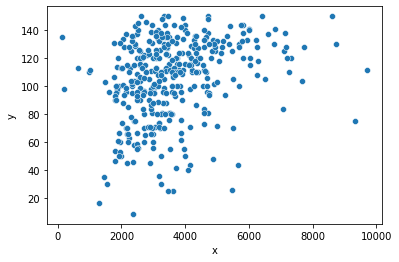

In [227]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To decide on the number of clusters, plot a line graph of the WCSS for a range of k values.

In [228]:
kmeans = MyKMeans()

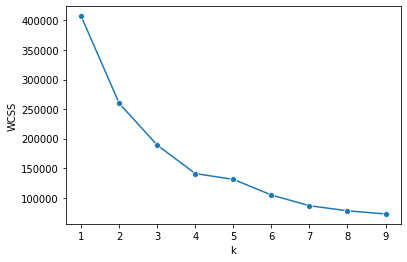

In [229]:
costs = []
for k in range(1, 10):
    kmeans.fit(X, k)
    centroids, cluster = kmeans.centroids, kmeans.clusters
    cost = wcss(X, centroids, cluster)
    costs.append(cost)
    
sns.lineplot(x=range(1,10), y=costs, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

Since the WCSS doesn't go down by much after 4, make 4 clusters. 

Fit the data for K-Means model and plot the results.

In [230]:
k = 4
kmeans.fit(X, k)
centroids_kmeans, clusters_kmeans = kmeans.centroids, kmeans.clusters

Text(0, 0.5, 'y')

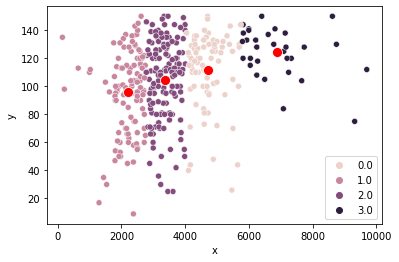

In [231]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters_kmeans)
sns.scatterplot(centroids_kmeans[:,0], centroids_kmeans[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

Do the same for K-Median model.

In [232]:
k = 4
kmedian = MyKMedian()
kmedian.fit(X, k)
centroids_kmedian, clusters_kmedian = kmedian.centroids, kmedian.clusters

Text(0, 0.5, 'y')

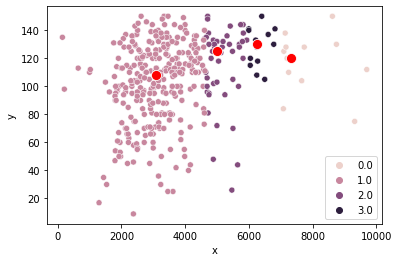

In [233]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters_kmedian)
sns.scatterplot(centroids_kmedian[:,0], centroids_kmedian[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')